# AI/ML 4 Climate Change - Exercise 2
### WS 2022 - TU Wien



In [175]:
import glob
import random
import pandas as pd
from IPython.display import Image

from functools import partial
from multiprocessing import Pool

import numpy as np


In [ ]:
# Getting the dataset
#import requests
#URL = "https://zenodo.org/record/5153305/files/2_LamaH-CE_daily.tar.gz?download=1"
#response = requests.get(URL)
#open("instagram.ico", "wb").write(response.content)


In [36]:
path = 'A_basins_total_upstrm/2_timeseries/daily'
files = glob.glob(path+'/*')

In [33]:
files

['A_basins_total_upstrm/2_timeseries/daily/ID_1.csv',
 'A_basins_total_upstrm/2_timeseries/daily/ID_10.csv',
 'A_basins_total_upstrm/2_timeseries/daily/ID_100.csv',
 'A_basins_total_upstrm/2_timeseries/daily/ID_101.csv',
 'A_basins_total_upstrm/2_timeseries/daily/ID_102.csv',
 'A_basins_total_upstrm/2_timeseries/daily/ID_103.csv',
 'A_basins_total_upstrm/2_timeseries/daily/ID_104.csv',
 'A_basins_total_upstrm/2_timeseries/daily/ID_105.csv',
 'A_basins_total_upstrm/2_timeseries/daily/ID_106.csv',
 'A_basins_total_upstrm/2_timeseries/daily/ID_107.csv',
 'A_basins_total_upstrm/2_timeseries/daily/ID_108.csv',
 'A_basins_total_upstrm/2_timeseries/daily/ID_109.csv',
 'A_basins_total_upstrm/2_timeseries/daily/ID_11.csv',
 'A_basins_total_upstrm/2_timeseries/daily/ID_110.csv',
 'A_basins_total_upstrm/2_timeseries/daily/ID_111.csv',
 'A_basins_total_upstrm/2_timeseries/daily/ID_112.csv',
 'A_basins_total_upstrm/2_timeseries/daily/ID_113.csv',
 'A_basins_total_upstrm/2_timeseries/daily/ID_114.cs

In [51]:
Image(url="https://zenodo.org/api/iiif/v2/5e7b63a7-7bea-46f6-a8ac-00d63e3cb9b1:c5697b0f-87ce-4b8d-94b2-a8296e3367d1:LamaH_banner.png/full/750,/0/default.png", width=300, height=300)



## Reading gauge attributes 
Here we read the attirbutes of the gagues, such as the location and elevation.

MUST FIX the coordinates between two different systems 
i.e. https://gis.stackexchange.com/questions/226892/converting-epsg2284-to-epsg4326-with-pyproj


In [116]:
# Read gauges attributes
path_attr = 'D_gauges/1_attributes/Gauge_attributes.csv'
df_attr = pd.read_csv(path_attr, sep = ';')
df_attr['lat'] = [  str(l)[0:2] + '.' + str(l)[2:4] for l in df_attr.lat.values ]
df_attr['lon'] = [  str(l)[0:2] + '.' + str(l)[2:4] for l in df_attr.lon.values ]

In [113]:
print(df_attr.columns)
df_attr.head(5)

Index(['ID', 'govnr', 'name', 'river', 'area_gov', 'elev', 'lon', 'lat',
       'country', 'fedstate', 'region', 'obsbeg_day', 'obsbeg_hr', 'obsend',
       'gaps_pre', 'gaps_post', 'area_ratio', 'nrs_euhyd', 'nrs_rivat',
       'typimpact', 'diur_art', 'diur_glac', 'degimpact'],
      dtype='object')


,ID,govnr,name,river,area_gov,elev,lon,lat,country,fedstate,...,obsend,gaps_pre,gaps_post,area_ratio,nrs_euhyd,nrs_rivat,typimpact,diur_art,diur_glac,degimpact
0,1,200014,Bangs,Rhein,4647.9,420,42.85,26.84,AUT,VBG,...,0,0.000,0.0,1.004,RL26007414,20447278.0,A,1,0,s
1,2,200048,Schruns (Vonbunweg),Litz,102.0,673,43.14,26.62,AUT,VBG,...,0,0.000,0.0,1.003,RL26006574,20452702.0,-,0,0,l
2,3,231662,Loruens-Aeule,Ill,535.2,579,43.09,26.68,AUT,VBG,...,0,0.000,0.0,1.002,RL26006800,20451771.0,"A,I",1,0,s
3,4,200592,Kloesterle (OEBB),Alfenz,66.6,1014,43.25,26.68,AUT,VBG,...,0,0.034,0.0,0.995,RL26006781,20451185.0,A,1,0,s
4,5,200097,Buers (Bruecke L82),Alvier,72.2,564,43.06,26.70,AUT,VBG,...,0,0.000,0.0,1.003,RL26006921,20450952.0,"E,F",0,0,s


In [92]:
print(df_attr.columns)
df_attr.head(5)

Index(['ID', 'govnr', 'name', 'river', 'area_gov', 'elev', 'lon', 'lat',
       'country', 'fedstate', 'region', 'obsbeg_day', 'obsbeg_hr', 'obsend',
       'gaps_pre', 'gaps_post', 'area_ratio', 'nrs_euhyd', 'nrs_rivat',
       'typimpact', 'diur_art', 'diur_glac', 'degimpact', 'lon_true',
       'lat_true'],
      dtype='object')


,ID,govnr,name,river,area_gov,elev,lon,lat,country,fedstate,...,gaps_post,area_ratio,nrs_euhyd,nrs_rivat,typimpact,diur_art,diur_glac,degimpact,lon_true,lat_true
0,1,200014,Bangs,Rhein,4647.9,420,42.85,26.84,AUT,VBG,...,0.0,1.004,RL26007414,20447278.0,A,1,0,s,26.84,42.85
1,2,200048,Schruns (Vonbunweg),Litz,102.0,673,43.14,26.62,AUT,VBG,...,0.0,1.003,RL26006574,20452702.0,-,0,0,l,26.62,43.14
2,3,231662,Loruens-Aeule,Ill,535.2,579,43.09,26.68,AUT,VBG,...,0.0,1.002,RL26006800,20451771.0,"A,I",1,0,s,26.68,43.09
3,4,200592,Kloesterle (OEBB),Alfenz,66.6,1014,43.25,26.68,AUT,VBG,...,0.0,0.995,RL26006781,20451185.0,A,1,0,s,26.68,43.25
4,5,200097,Buers (Bruecke L82),Alvier,72.2,564,43.06,26.70,AUT,VBG,...,0.0,1.003,RL26006921,20450952.0,"E,F",0,0,s,26.70,43.06


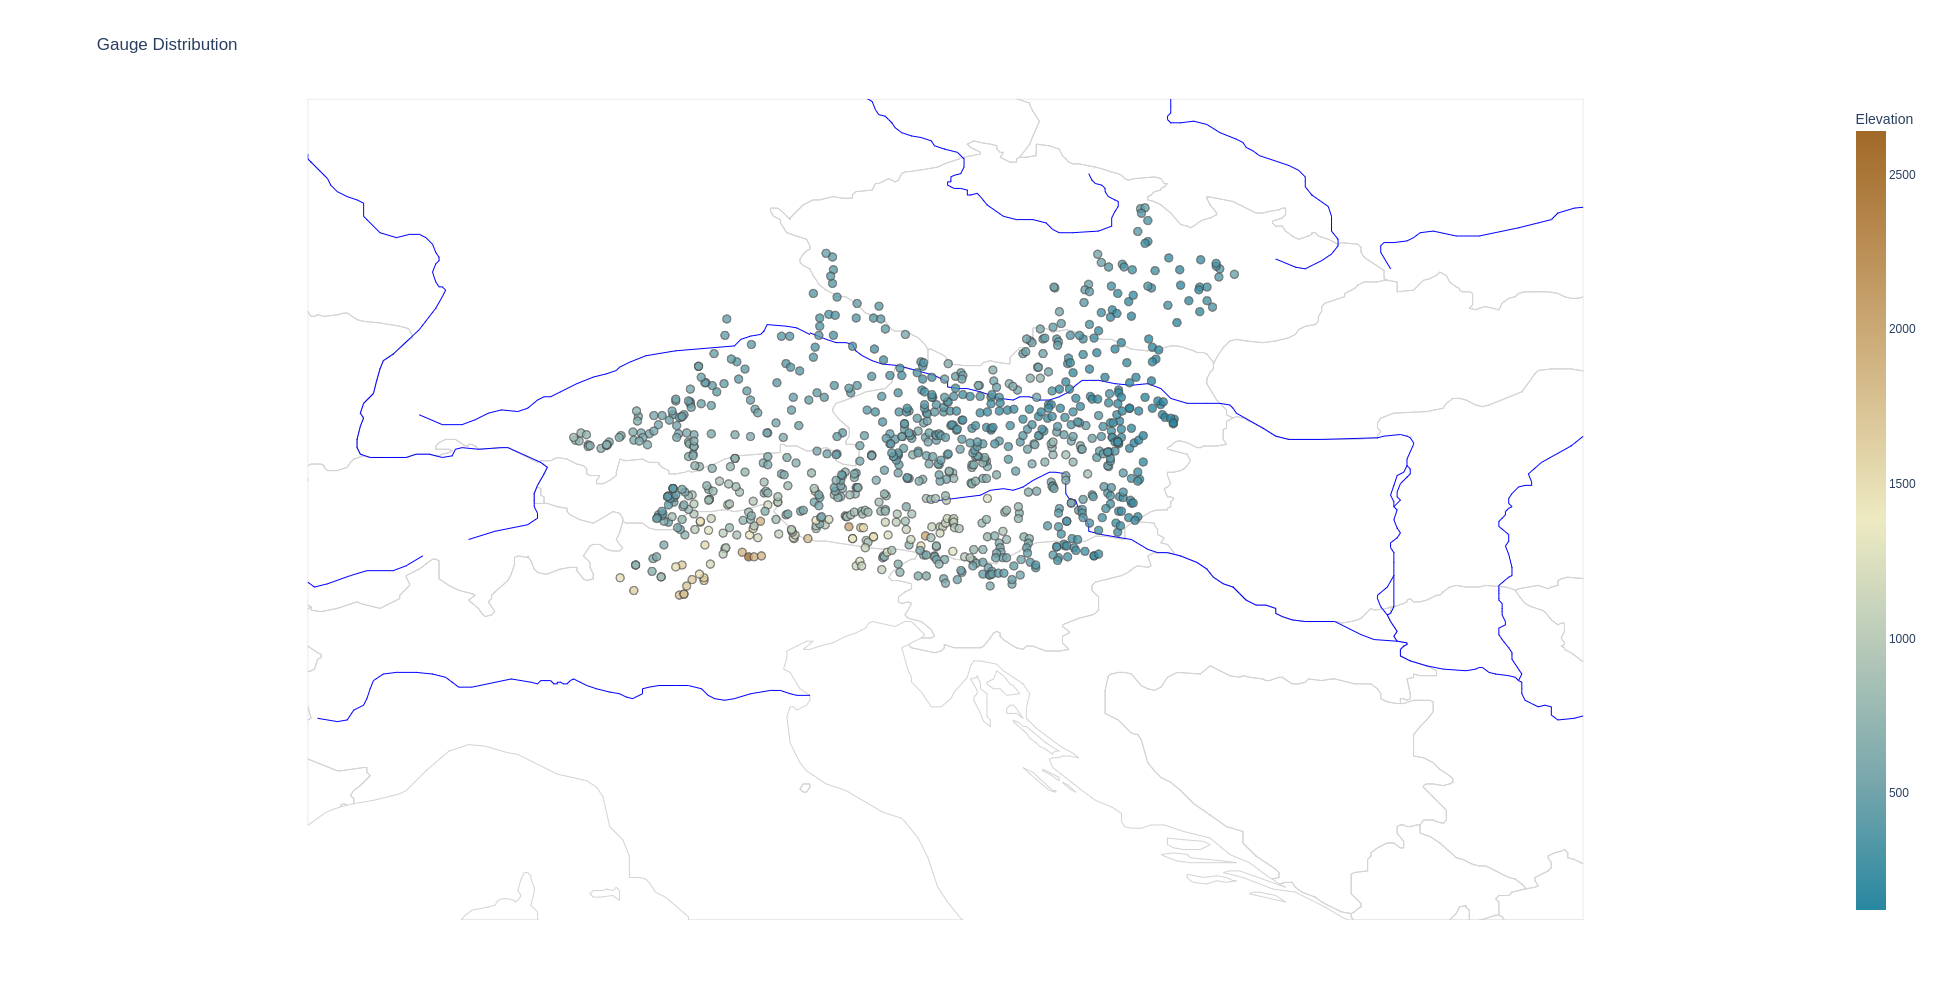

In [164]:
import plotly.graph_objects as go
import plotly.express as px


df_attr['lat_true'] = [float(l) + 20.1 for l in df_attr.lat] 
df_attr['lon_true'] = [float(l) -32 for l in df_attr.lon] 


fig = go.Figure(data=go.Scattergeo(
        lon = df_attr['lon_true'],
        lat = df_attr['lat_true'],
        #text = df['text'],
        mode = 'markers',
            marker = dict(
            size = 8,
            opacity = 0.8,
            reversescale = True,
            autocolorscale = False,
            line = dict(
                width=1,
                color='rgba(102, 102, 102)'
            ),
            #colorscale = px.colors.diverging.BrBG,
            colorscale = 'Earth',
                
            colorbar_title="Elevation"

    ),
        marker_color = df_attr['elev'],

        #color_continuous_scale=px.colors.diverging.BrBG,

        ))

fig.update_layout(
        title = 'Gauge Distribution',
        height=1000, width=1800,
  
)

fig.update_geos(
    visible=False, resolution=50,
    showcountries=True, countrycolor="lightgray",
    showrivers=True, rivercolor="Blue",
    center=dict(lon=14, lat=47),
    #projection_rotation=dict(lon=30, lat=30, roll=30),
    lataxis_range=[45,54], lonaxis_range=[5, 19]
)

#fig.update_layout(coloraxis=dict(colorscale='Bluered_r'), showlegend=True)

fig.show()

In [44]:
# Randomize or not the first 100 files
shuff = False

if shuff:
    random.shuffle(files)
    files = files[:100]
else:
    files=files[:100]

In [195]:
# Reading example with pandas
import datetime
def read_df(file):
    """ Reads the dataframe from csv files """
    
    df = pd.read_csv(file, sep = ';')
    
    #dt = [ pd.to_datetime( df.YYYY.values[i] + df.MM.values[i] + df.DD.values[i], format='Ymd', errors='ignore') for i in range(len(df.YYYY.values)) ] 
    
    # Create date-time objects (for plotly)
    dt = [datetime.datetime(df.YYYY.values[i], df.MM.values[i] , df.DD.values[i]) for i in range(len(df.YYYY.values))  ]
    df['date_time'] = dt
    
    
    # TO DO add 
    return df



# read one file as example
df = read_df(files[0])
# check columns
# df.columns

In [191]:
df.columns

Index(['YYYY', 'MM', 'DD', 'DOY', '2m_temp_max', '2m_temp_mean', '2m_temp_min',
       '2m_dp_temp_max', '2m_dp_temp_mean', '2m_dp_temp_min', '10m_wind_u',
       '10m_wind_v', 'fcst_alb', 'lai_high_veg', 'lai_low_veg', 'swe',
       'surf_net_solar_rad_max', 'surf_net_solar_rad_mean',
       'surf_net_therm_rad_max', 'surf_net_therm_rad_mean', 'surf_press',
       'total_et', 'prec', 'volsw_123', 'volsw_4', 'date_time'],
      dtype='object')

In [192]:
df.head()

,YYYY,MM,DD,DOY,2m_temp_max,2m_temp_mean,2m_temp_min,2m_dp_temp_max,2m_dp_temp_mean,2m_dp_temp_min,...,surf_net_solar_rad_max,surf_net_solar_rad_mean,surf_net_therm_rad_max,surf_net_therm_rad_mean,surf_press,total_et,prec,volsw_123,volsw_4,date_time
0,1981,1,1,1,-4.3,-6.2,-8.5,-7.0,-10.2,-13.7,...,94,17,42,24,84717,0.16,6.04,0.34,0.38,1981-01-01
1,1981,1,2,2,-5.9,-7.4,-8.9,-7.8,-9.6,-10.8,...,86,18,35,17,84680,0.22,11.84,0.33,0.38,1981-01-02
2,1981,1,3,3,-1.0,-3.1,-5.6,-3.0,-5.8,-7.7,...,91,20,37,12,83786,0.28,10.65,0.34,0.38,1981-01-03
3,1981,1,4,4,-1.7,-4.0,-7.8,-3.1,-5.4,-10.3,...,46,11,61,23,83203,0.17,17.41,0.34,0.38,1981-01-04
4,1981,1,5,5,-8.0,-9.8,-10.7,-10.8,-12.6,-13.7,...,86,19,56,28,83778,0.38,13.59,0.34,0.38,1981-01-05


## Plot Time Series of precipitation

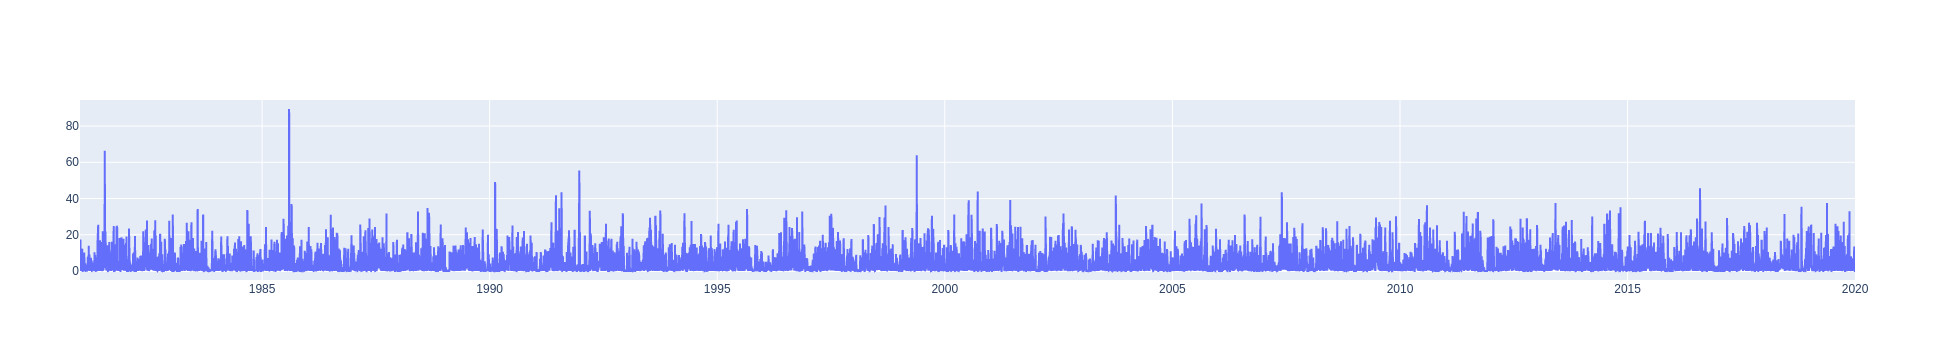

In [196]:
import plotly.graph_objects as go


def make_series(df, what=''):
    """ Create a simple line plot for time series """
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df.date_time, y=df[what], name=what + ' time Series',
                    line_shape='linear'))

    return fig

f = make_series(df, 'prec')

f.show()

In [172]:
# Create a global dataset 
from functools import partial
from multiprocessing import Pool




In [172]:
# Running on multiprocessing in parallel
num_proc = 20
func=partial(read_df)
p = Pool(num_proc)
all_df=list(p.map(func,files))

# Creating one single dataframe and treat the observation as independent (no time correlation)
global_df = pd.concat(all_df) 
    

# Machine Learning Models

## Random Forest
will follow https://towardsdatascience.com/random-forest-in-python-24d0893d51c0